# LASSO (Least Absolute Shrinkage and Selection Operator)  

### Julián D. Arias Londoño

Profesor Asociado  
Departamento de Ingeniería de Sistemas  
Universidad de Antioquia, Medellín, Colombia  
julian.ariasl@udea.edu.co

Se busca explicar $Y$ a través de $p$ variables potencialmente explicativas $X_i$. Para eso hacemos $n$ observaciones y modelizamos la variable $Y$ como se muestra a continuación:

$$Y=X \beta +\epsilon; X_i, \forall i=1,...,p$$

Donde $\epsilon$ es un vector de variables aleatorias y corresponde al ruido generado por las observaciones, generalmente este vector es ignorado y el modelo se puede trabajar como $Y=X\beta$. Las variables $X_i$ no son todas pertinentes para describir el modelo $Y$, por lo cual el objetivo es eliminar las variables "inútiles".


El método LASSO es una técnica que consiste en estimar los parámetros $\beta_i, i=1,...,p$ de tal forma que podamos eliminar los valores $X_i, i=1,...,p$ no pertinentes. La idea de LASSO es hacer una regresión regularizada que convierta en 0 algunos de los coeficientes $\beta$. Para hacer eso se define el vector $\beta$ de estimadores usando:

$$\arg\min_\beta \sum_{i=1}^N\left((y_i-\sum_{j=1}^p\beta_jx_{ij})^2+\lambda\sum_{j=1}^p|\beta_j|\right); \lambda \ge 0$$

también se puede escribir:

$$\arg \min_\beta \sum_{i=1}^N((y_i-\sum_{j=1}^p\beta_jx_{ij})^2$$ Sujeto a: $$\sum_{j=1}^p|\beta_j| \le s$$

### Características LASSO:

$\cdot$ El uso de la norma L1 como penalización.

$\cdot$ Permite anular ciertas variables en el modelo.

$\cdot$ Los parametros $\lambda$ y $s$ respectivamente controlan la regularización. Si el valor de $\lambda=0$ entonces LASSO se comportaría como una regresión lineal, si $\lambda$ es muy grande entonces todos los coeficientes $\beta$ tienden a 0. Si la regularización se especifíca en función de la segunda representación, entonces el valor de la variable $s$ influye en el modelo de forma inversa a $\lambda$.

El algoritmo LASSO consiste en determinar $\beta(\lambda)$ para todo $\lambda \ge 0$. Finalmente de lo que se trata es de determinar el mejor valor $\lambda$ de manera que perduren únicamente las variables explicativas del modelo. La estimación del valor $\lambda$ se obtiene por validación cruzada.

Algunos algoritmos importantes para resolver LASSO reduciendo la complejidad computacional son: LARS y coordenada descentente.

### Primer Ejemplo (Entrenamiento):

En el primer ejemplo se muestra el vector resultante después de aplicar LASSO a un conjunto de datos.

In [3]:
from sklearn import linear_model, datasets
diabetes=datasets.load_diabetes()
clf=linear_model.Lasso(alpha=0.5)
clf.fit(diabetes.data,diabetes.target)
print(clf.coef_)

[   0.           -0.          471.03873321  136.50710814   -0.           -0.
  -58.3195488     0.          408.02332435    0.        ]


### Segundo Ejemplo (Entrenamiento y Predicción):

En el segundo ejemplo se ve como después del entrenamiento y obtención de los parámetros, se hace una predicción.

In [5]:
import numpy as np
from sklearn import linear_model
clf=linear_model.Lasso(alpha=1)
y_pred=clf.fit([[0,0],[1,1],[2,5]],[0,1,4]).predict([3,7])
print(clf)
print(clf.coef_)
print(clf.intercept_)
print(y_pred)
print "r^2 on test data : %f" % (1 - np.linalg.norm(4 - y_pred)**2
                                      / np.linalg.norm(4)**2)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
[ 0.          0.57142857]
0.52380952381
[ 4.52380952]
r^2 on test data : 0.982851


/home/julian/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


### Tercer Ejemplo (Entrenamiento y Predicción):

En el tercer ejemplo se genera una mayor cantidad de datos, se observan la matriz de los valores generados y la gráfica asociada

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
[-0.         -0.         -0.         -0.58215254  1.39465805 -0.
  0.32599086 -0.          0.         -0.          0.          0.66366198
 -0.         -0.         -0.          0.          0.          0.          0.
  0.          0.         -0.         -0.          0.          0.          0.
  0.68520777 -0.         -0.00619203 -0.          0.          0.39812168
 -0.         -0.          0.          0.         -0.          0.          0.
  2.24258889  0.         -0.          0.         -0.         -0.         -0.
  0.          0.          0.          0.08416079 -0.         -0.          0.
  0.         -0.         -0.         -0.          0.         -0.78250881
  0.         -0.         -0.53334428  0.         -0.         -0.         -0.
  0.12474584 -0.          0.         -0.         -0.          0

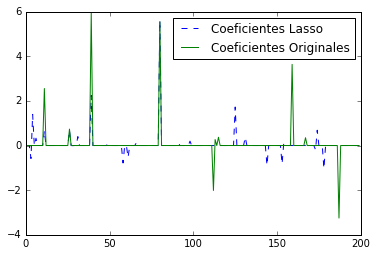

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

###############################################################################
# Generar datos
np.random.seed(42)

n_samples, n_features = 50, 200
X = np.random.randn(n_samples, n_features)
coef = 3 * np.random.randn(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0
y = np.dot(X, coef)

# Adicionar ruido
y += 0.01 * np.random.normal((n_samples,))

# Dividir los datos en entrenamiento y test
n_samples = X.shape[0]
X_train, y_train = X[:n_samples / 2], y[:n_samples / 2]
X_test, y_test = X[n_samples / 2:], y[n_samples / 2:]

###############################################################################
# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print(lasso.coef_)
print("r^2 on test data : %f" % r2_score_lasso)
plt.figure(1)
plt.plot(lasso.coef_, '--', label='Coeficientes Lasso')
plt.plot(coef, label='Coeficientes Originales')
plt.legend(loc='best')

### Cuarto Ejemplo (Incidencia del parámetro de regularización):

En el cuarto ejemplo se ve una gráfica que se conoce como LassoPath que muestra la influecia del valor de regularización sobre los parámetros del modelo.

Computing regularization path using the LARS ...
.

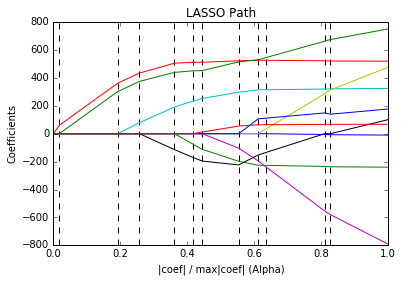

In [3]:
# Author: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

print("Computing regularization path using the LARS ...")
alphas, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef| (Alpha)')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

### Ventajas LASSO:

Permite identificar fácil y directamente las variables que no son pertinentes para el modelo (Se convierten directamente en 0 a través del estimador), por lo cual no es necesario hacer test de hipótesis.

Es un método ámpliamente usado en muchos campos y tiene muchas aplicaciones prácticas.

Algunas de las herramientas computacionales más usadas (Matlab, Octave, Python, R) poseen una implementación nativa que es muy fácil de usar.

### Desventajas LASSO:

La penalización de norma 1 se aplica por igual a todos los parámetros.


No se puede garantizar que LASSO obtiene siempre las variables pertinentes de cualquier modelo dado.

Matemáticamente es difícil calcular el error estándar del método, ya que la estimación que propone no es lineal y la penalización de la norma 1 no es derivable. Para solventar dicho problema se propone un cálculo probabilístico para obtener una varianza del error estimado.

### Variantes:

A partir de la formulación LASSO se han creado variantes, algunas de ellas son :

Regresion Elastic Net, Regresion Lasso Adaptativo, Regresion Lasso Relajado

# Elastic Nets

Es una variante de los métodos de regresión con regularización, en el cual se incluyen dos términos de regularización en lugar de uno. 

$$\arg\min_\beta \sum_{i=1}^N\left((y_i-\sum_{j=1}^p\beta_jx_{ij})^2+\lambda_1\sum_{j=1}^p|\beta_j| + \lambda_2\sum_{j=1}^p \beta_j^2\right)$$

<ul>
<li> Este modelo es particularmente útil cuando $p >> N$ </li>
<li> El término de regularización $L_1$ estimula el modelo a ser disperso</li>
<li> El término de regularización $L_2$ estimula el modelo a predictores altamente correlacionados a tener coeficientes similares</li>
</ul>

Automatically created module for IPython interactive environment
Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positve elastic net...


/usr/lib/python2.7/dist-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


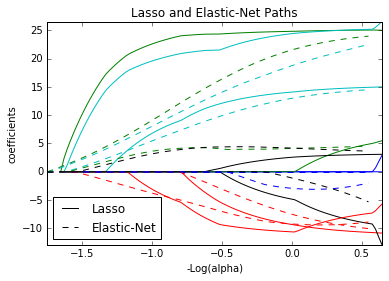

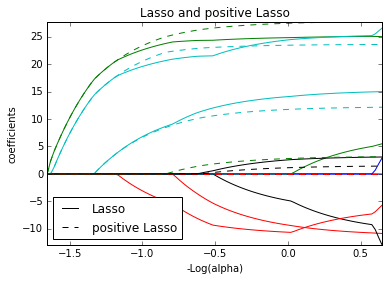

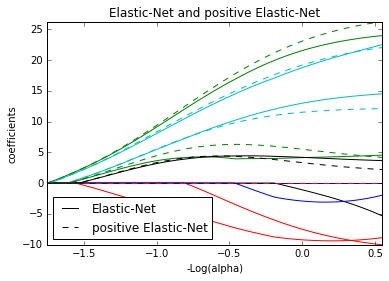

In [4]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps, positive=True, fit_intercept=False)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Computing regularization path using the positve elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# Display results

plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T, linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


plt.figure(2)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_positive_lasso), coefs_positive_lasso.T,
              linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')


plt.figure(3)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_enet), coefs_enet.T)
l2 = plt.plot(-np.log10(alphas_positive_enet), coefs_positive_enet.T,
              linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')
plt.show()

Automatically created module for IPython interactive environment
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.384710
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.240176


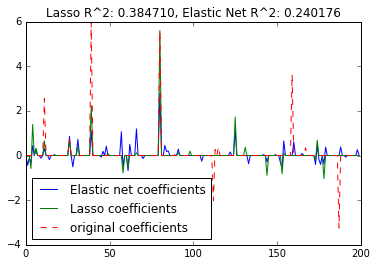

In [8]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

###############################################################################
# generate some sparse data to play with
np.random.seed(42)

n_samples, n_features = 50, 200
X = np.random.randn(n_samples, n_features)
coef = 3 * np.random.randn(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0  # sparsify coef
y = np.dot(X, coef)

# add noise
y += 0.01 * np.random.normal((n_samples,))

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples / 2], y[:n_samples / 2]
X_test, y_test = X[n_samples / 2:], y[n_samples / 2:]

###############################################################################
# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

###############################################################################
# ElasticNet
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.plot(enet.coef_, label='Elastic net coefficients')
plt.plot(lasso.coef_, label='Lasso coefficients')
plt.plot(coef, '--', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()

### Bibliografía

Effron, B et al. Least Angle Regression. Annals of Statistics. (2004)

Friedman, Jerome et al. Regularization Paths for Generalized Linear Models via Coordinate Descent. Journal of Statistical Software (2010)

Murphy, Kevin. Machine Learning, A probabilistic Perspective. MIT Press. (2012)

Tibshirani, Robert. Regression Shrinkage and Selection via the Lasso. Journal of the Royal Statistical Society, Volumen 58, Issue 1, (1996)